# Test Model Inference

In [1]:
import torch
import librosa as rs
import matplotlib.pyplot as plt   
import IPython.display as ipd
from utils.hparams import HParam
from common import run,get_model, evaluate

In [2]:
path_noisy = "../sample/in_16kHz_cafe.wav"
#path_noisy = "../sample/sports_1ch_16kHz.wav"
#path_noisy = "../sample/in_talk.wav"
#path_noisy = "../sample/in_news.wav"

#path_noisy = "../sample/JD_YTB_news.wav"
#path_noisy = "../sample/JD_YTB_show.wav"
#path_noisy = "../sample/JD_YTB_talk.wav"

def run(version) : 
    hp = HParam("../config/mpSEv2/{}.yaml".format(version),"../config/mpSEv2/default.yaml",merge_except=["architecture"])
    model = get_model(hp,"cpu")
    model.load_state_dict(torch.load("/home/nas/user/kbh/mpSEv2/chkpt/{}/best_pesq.pt".format(version), map_location="cpu"))
    model.eval()
    with torch.no_grad():
        noisy = rs.load(path_noisy,sr=hp.data.sr)[0]
        noisy = torch.unsqueeze(torch.from_numpy(noisy),0)
        estim = model(noisy).cpu().detach().numpy()[0]
    ipd.display(ipd.Markdown("## {}".format(version)))
    ipd.display(ipd.Audio(estim, rate=16000))

    
    plt.figure()
    fig = plt.specgram(noisy[0],NFFT=512,Fs=16000,cmap="jet")
    plt.figure()
    fig = plt.specgram(estim,NFFT=512,Fs=16000,cmap="jet")
    plt.show()

kernel_type : GConv+Att


## v158

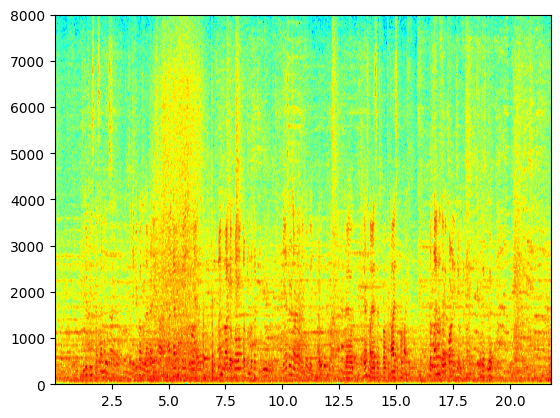

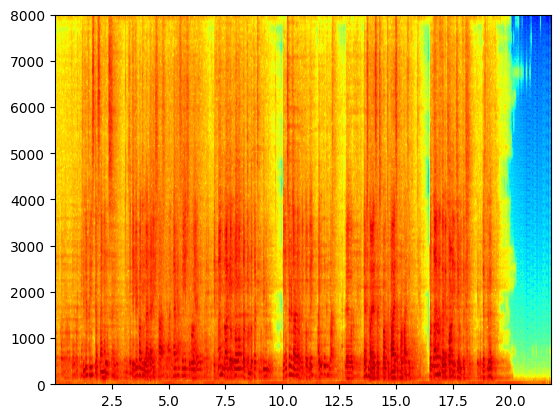

In [5]:
noisy = rs.load(path_noisy,sr=16000)[0]
ipd.display(ipd.Audio(noisy, rate=16000))

# v108 : K-UNet
# v132 : ONNX compatible version
# v138 : v132 + JDSolution

#run("v133")
#run("v151")
#run("v152")
run("v158")
#run("v133")